In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [39]:
# import required packages
import pandas as pd
import numpy as np

# preprocess
from sklearn.model_selection import train_test_split

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# load negative or not clickbait dataset into dataframe
# no column present for class label
df_0 = pd.read_csv('../data/non_clickbait_data', on_bad_lines='skip', header=None)

# set column title
df_0.columns = ['headline']

# shape of dataset: (rows, columns)
print(df_0.shape)

# first 5 datapoints
df_0.head()

(12907, 1)


,headline
0,Bill Changing Credit Card Rules Is Sent to Oba...
1,1700 runners still unaccounted for in UK's Lak...
2,Yankees Pitchers Trade Fielding Drills for Put...
3,Large earthquake rattles Indonesia; Seventh in...
4,Coldplay's new album hits stores worldwide thi...


In [3]:
# add column for class label: not clickbait -> 0
df_0['clickbait'] = pd.Series(np.zeros(df_0.shape[0], dtype=int))

# first 5 datapoints with label
df_0.head()

,headline,clickbait
0,Bill Changing Credit Card Rules Is Sent to Oba...,0
1,1700 runners still unaccounted for in UK's Lak...,0
2,Yankees Pitchers Trade Fielding Drills for Put...,0
3,Large earthquake rattles Indonesia; Seventh in...,0
4,Coldplay's new album hits stores worldwide thi...,0


In [4]:
# load positive or clickbait dataset into dataframe
# no column present for class label
df_1 = pd.read_csv('../data/clickbait_data', on_bad_lines='skip', header=None)

# set column title
df_1.columns = ['headline']

# shape of dataset: (rows, columns)
print(df_1.shape)

# first 5 datapoints
df_1.head()

(15303, 1)


,headline
0,Should I Get Bings
1,Which TV Female Friend Group Do You Belong In
2,"The New ""Star Wars: The Force Awakens"" Trailer..."
3,"This Vine Of New York On ""Celebrity Big Brothe..."
4,A Couple Did A Stunning Photo Shoot With Their...


In [5]:
# add column for class label: not clickbait -> 0
df_1['clickbait'] = pd.Series(np.ones(df_1.shape[0], dtype=int))

# first 5 datapoints with label
df_1.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [6]:
# concat both positve and negative dataframes
# shuffle dataframe randomly
df = pd.concat([df_0, df_1]).sample(frac=1, random_state=42).reset_index(drop=True)

# shape: (rows, columns)
print(df.shape)

# first 5 datapoints
df.head()

(28210, 2)


,headline,clickbait
0,14 People Who You Totally Have Saved In Your P...,1
1,Episcopal Vote Reopens a Door to Gay Bishops,0
2,Main UN compound in Gaza shelled with 'white p...,0
3,Are You More Like Julianne Or Derek Hough,1
4,50 dead after ferry in Myanmar capsizes,0


In [7]:
# save the entire dataset
# df.to_csv('../data/data.csv')

1    15303
0    12907
Name: clickbait, dtype: int64

null counts
headline     0
clickbait    0
dtype: int64

duplicate counts: 0


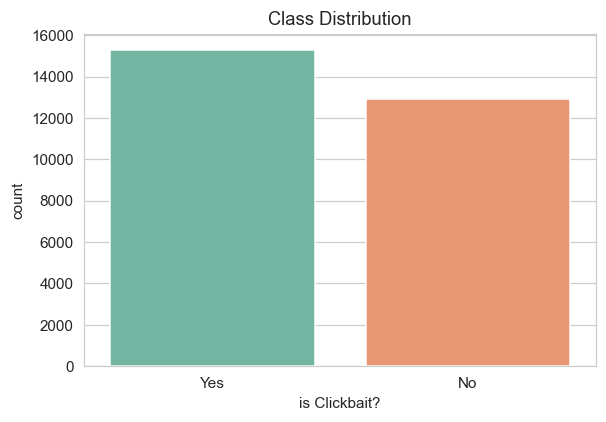

In [37]:
# class distribution
print(df['clickbait'].value_counts())

# check null value counts
print('\nnull counts')
print(df.isnull().sum())


# check duplicate datapoint counts
print('\nduplicate counts:',df.headline.duplicated().sum())

# plot the class distribution
plt.figure(dpi=110)
chart = sns.countplot(
    x="clickbait",
    data=pd.DataFrame({
        'headline': df.headline.values,
        'clickbait': ['Yes' if x==1 else 'No' for x in df.clickbait.values]
        },
        columns=['headline', 'clickbait']
    ),
    palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('is Clickbait?')
plt.show()

In [42]:
# split into train-validation-test sets (60-20-20)
# perform a random split

# train-test split (80-20)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# train-validation split (80-20)
# 0.8 * 0.25 = 0.2
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=42)

# rest index
df_train.reset_index()
df_valid.reset_index()
df_test.reset_index()

# size of train-validation-test sets
print('train:',df_train.shape[0])
print('valid:',df_valid.shape[0])
print('test:',df_test.shape[0])

# save validation set
# df_valid.to_csv('../data/valid_data.csv')

# save test set
# df_test.to_csv('../data/test_data.csv')

# save train set
df_train.to_csv('../data/train_data.csv')

train: 16926
valid: 5642
test: 5642
